In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import pandas_profiling as pp


from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.impute import SimpleImputer

In [2]:
filename='2021_LoL_esports_match_data_from_OraclesElixir_20221108.csv'
df=pd.read_csv(filename)

df.head()



,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1.0,10.25,...,118.0,748.0,-56.0,-4.0,2.0,0.0,1.0,0.0,1.0,1.0
1,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1.0,10.25,...,84.0,2120.0,3405.0,62.0,3.0,2.0,0.0,2.0,0.0,3.0
2,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1.0,10.25,...,143.0,1578.0,354.0,15.0,2.0,3.0,0.0,0.0,0.0,0.0
3,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1.0,10.25,...,120.0,124.0,102.0,10.0,0.0,4.0,2.0,1.0,1.0,2.0
4,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1.0,10.25,...,25.0,448.0,450.0,3.0,1.0,4.0,0.0,0.0,2.0,2.0


In [3]:
#cleaning the data


#Checking for any missing data type and values

df.info()
num_vars = df.columns[df.dtypes != 'object']
cat_vars = df.columns[df.dtypes == 'object']

print(num_vars)
print(cat_vars)
df[num_vars].isnull().sum().sort_values(ascending =False)/len(df)


#checking if the columns that are relatable to my hypothesis are as bad in missing data
print(df['xpdiffat15'].isnull().sum()/len(df))
print(df['golddiffat15'].isnull().sum()/len(df))
print(df['killsat15'].isnull().sum()/len(df))
print(df['csdiffat15'].isnull().sum()/len(df))
print(df['barons'].isnull().sum()/len(df))
print(df['opp_barons'].isnull().sum()/len(df))
print(df['xpat15'].isnull().sum()/len(df))
print(df['opp_xpat15'].isnull().sum()/len(df))
print(df['goldat15'].isnull().sum()/len(df))
print(df['opp_goldat15'].isnull().sum()/len(df))
print(df['opp_killsat15'].isnull().sum()/len(df))
print(df['csat15'].isnull().sum()/len(df))
print(df['opp_csat15'].isnull().sum()/len(df))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150264 entries, 0 to 150263
Columns: 123 entries, gameid to opp_deathsat15
dtypes: float64(94), int64(11), object(18)
memory usage: 141.0+ MB
Index(['year', 'playoffs', 'game', 'patch', 'participantid', 'gamelength',
       'result', 'kills', 'deaths', 'assists',
       ...
       'opp_csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15',
       'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15',
       'opp_deathsat15'],
      dtype='object', length=105)
Index(['gameid', 'datacompleteness', 'url', 'league', 'split', 'date', 'side',
       'position', 'playername', 'playerid', 'teamname', 'teamid', 'champion',
       'ban1', 'ban2', 'ban3', 'ban4', 'ban5'],
      dtype='object')
0.08592876537294362
0.08592876537294362
0.08592876537294362
0.08592876537294362
0.7315125379332375
0.7315125379332375
0.08592876537294362
0.08592876537294362
0.08592876537294362
0.08592876537294362
0.08592876537294362
0.08592876537294362

In [4]:

drop_cols=['gameid','datacompleteness','url','league','split','date',
        'side','position','playername','playerid','teamname','teamid',
        'champion','ban1','ban2','ban2','ban3','ban4','ban5','year','playoffs','game',
        'patch','participantid','gamelength','result','kills','deaths','assists','doublekills'
        ,'triplekills','quadrakills','pentakills','firstblood','firstbloodassist',
        'firstbloodvictim','teamkills','teamdeaths','firstbloodkill','team kpm','ckpm','firstdragon',
        'dragons','opp_dragons','elementaldrakes','opp_elementaldrakes','infernals',
     'mountains','clouds','oceans','chemtechs','hextechs','dragons (type unknown)',
     'elders','opp_elders','firstherald','heralds','opp_heralds','firsttower','towers','opp_towers',
     'firstmidtower','firsttothreetowers', 'turretplates','opp_turretplates','inhibitors','opp_inhibitors'
      ,'damagetochampions','dpm','damageshare','damagetakenperminute','damagemitigatedperminute','wardsplaced',
     'wpm','controlwardsbought','wardskilled','wcpm','visionscore','vspm','totalgold','earnedgold','earned gpm',
      'earnedgoldshare','goldspent','gspd','total cs','minionkills','monsterkills','monsterkillsownjungle','monsterkillsenemyjungle','cspm',
     'firstbaron','goldat10','xpat10','csat10','opp_goldat10','opp_xpat10','opp_csat10','assistsat10','deathsat10','opp_killsat10','opp_assistsat10',
      'golddiffat10','xpdiffat10','csdiffat10','killsat10','opp_deathsat10','assistsat15','deathsat15','opp_assistsat15','opp_deathsat15',
        'opp_barons','opp_goldat15','opp_xpat15','opp_csat15','opp_killsat15']

data=df.drop(drop_cols,axis=1)
data['barons']=data['barons'].fillna(0)
#imputer.fit(data)

data.dropna(subset=['goldat15'],inplace=True)
data.dropna(subset=['xpat15'],inplace=True)
data.dropna(subset=['csat15'],inplace=True)
data.dropna(subset=['golddiffat15'],inplace=True)
data.dropna(subset=['xpdiffat15'],inplace=True)
data.dropna(subset=['csdiffat15'],inplace=True)
data.dropna(subset=['killsat15'],inplace=True)

print(data.head())
data.info()



   barons  goldat15  xpat15  csat15  golddiffat15  xpdiffat15  csdiffat15  \
0     0.0    5407.0  7536.0   114.0         748.0       -56.0        -4.0   
1     0.0    6974.0  8232.0   146.0        2120.0      3405.0        62.0   
2     0.0    6591.0  7827.0   158.0        1578.0       354.0        15.0   
3     0.0    5202.0  5053.0   130.0         124.0       102.0        10.0   
4     0.0    3853.0  4681.0    28.0         448.0       450.0         3.0   

   killsat15  
0        2.0  
1        3.0  
2        2.0  
3        0.0  
4        1.0  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 137352 entries, 0 to 150263
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   barons        137352 non-null  float64
 1   goldat15      137352 non-null  float64
 2   xpat15        137352 non-null  float64
 3   csat15        137352 non-null  float64
 4   golddiffat15  137352 non-null  float64
 5   xpdiffat15    137352 non

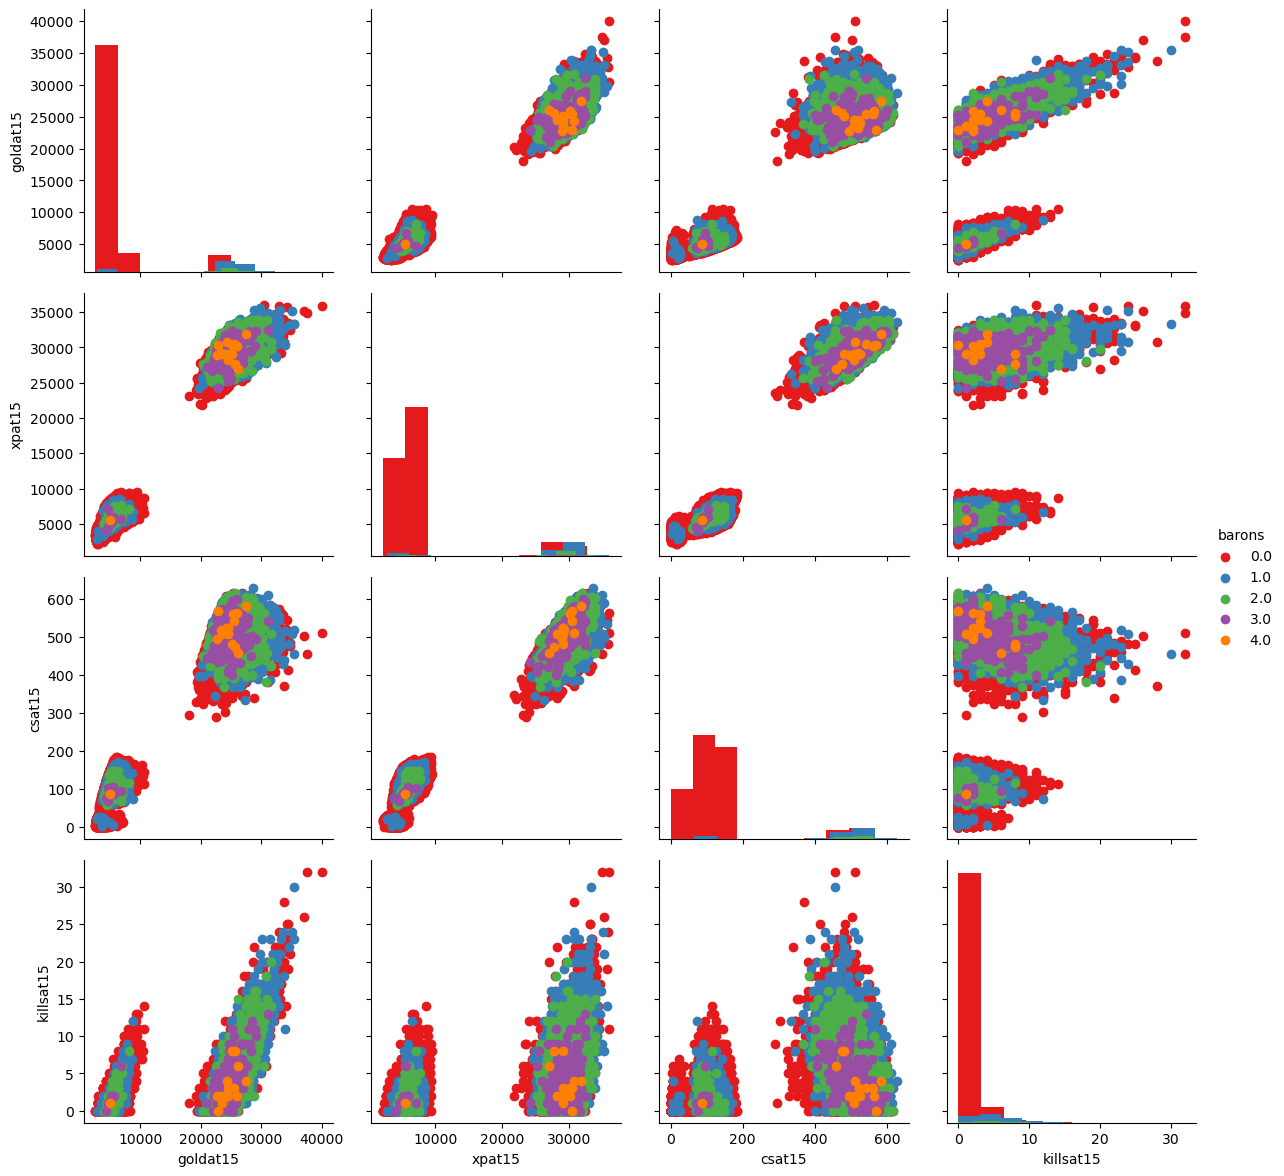

In [5]:
#checking relationship between features and baron
g = sns.PairGrid(data=data, vars=['goldat15','xpat15','csat15','killsat15'],
             hue='barons',height=3,palette='Set1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()



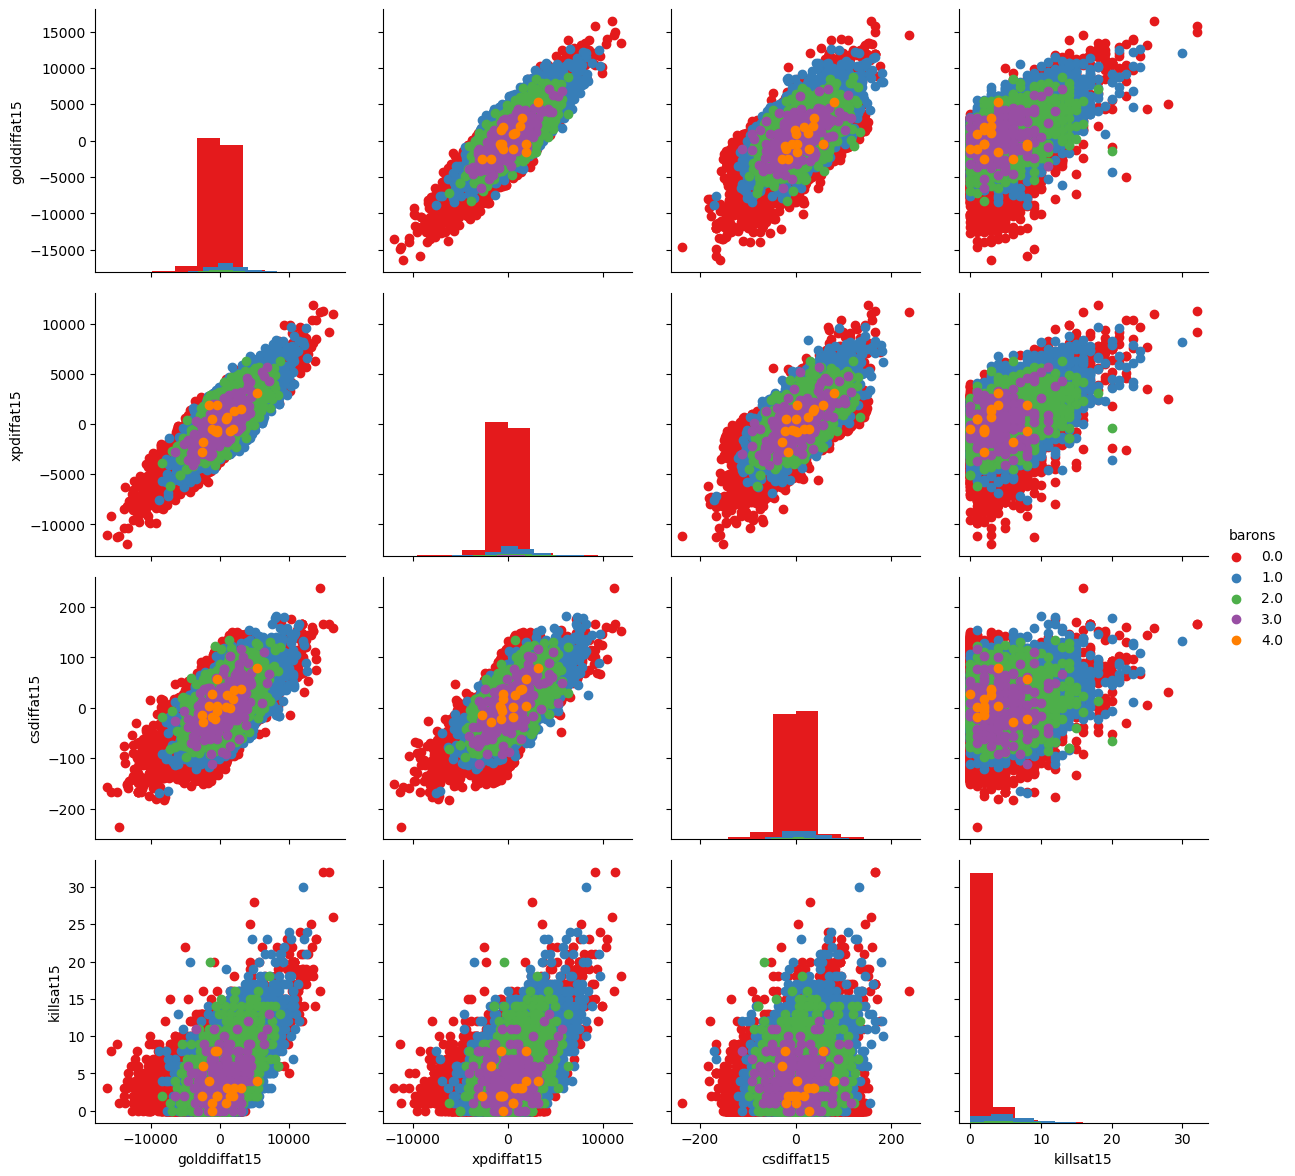

In [6]:
j = sns.PairGrid(data=data, vars=['golddiffat15','xpdiffat15','csdiffat15','killsat15'],
             hue='barons',height=3,palette='Set1')
j.map_diag(plt.hist)
j.map_offdiag(plt.scatter)
j.add_legend()
plt.show()

In [48]:
#splitting dataset 
X=data.drop('barons',axis=1).copy()
y=data['barons'].copy()

X.head()



<class 'pandas.core.series.Series'>
Int64Index: 137352 entries, 0 to 150263
Series name: barons
Non-Null Count   Dtype  
--------------   -----  
137352 non-null  float64
dtypes: float64(1)
memory usage: 2.1 MB


In [37]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


tree=DecisionTreeClassifier()
model=tree.fit(X_test,y_test)
y_test=y_test.array.reshape(-1,1)
y_pred=tree.predict(y_test)



/Users/mohammed/opt/anaconda3/envs/sports/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but DecisionTreeClassifier is expecting 7 features as input.

In [36]:
print(X_train)
print(X_test)


        goldat15   xpat15  csat15  killsat15
83322     5440.0   6101.0   104.0        1.0
77310     5478.0   6012.0   112.0        2.0
76793     5419.0   8120.0   154.0        0.0
25716     5069.0   7461.0   123.0        0.0
127642   25527.0  30973.0   546.0        4.0
...          ...      ...     ...        ...
20299     5252.0   7644.0   150.0        0.0
93915     6682.0   6228.0   138.0        1.0
35259     6006.0   5644.0   149.0        2.0
115522   23629.0  28467.0   488.0        4.0
8240      5412.0   6136.0   143.0        1.0

[96146 rows x 4 columns]
        goldat15   xpat15  csat15  killsat15
138034   22848.0  27752.0   484.0        3.0
46411     5615.0   8328.0   161.0        1.0
18463     5298.0   7729.0   143.0        0.0
68494    27218.0  30716.0   523.0        5.0
142598    5996.0   7184.0   120.0        2.0
...          ...      ...     ...        ...
87515    21947.0  26603.0   437.0        2.0
30841     5123.0   6703.0   111.0        0.0
128131    6274.0   6988.0   1